In [7]:
import pandas as pd


df = pd.read_csv("Social Media Users.csv")


print("Названия колонок в файле:")
print(df.columns.tolist())


Названия колонок в файле:
['Platform', 'Owner', 'Primary Usage', 'Country', 'Daily Time Spent (min)', 'Verified Account', 'Date Joined']


Точность модели по активности: 0.83


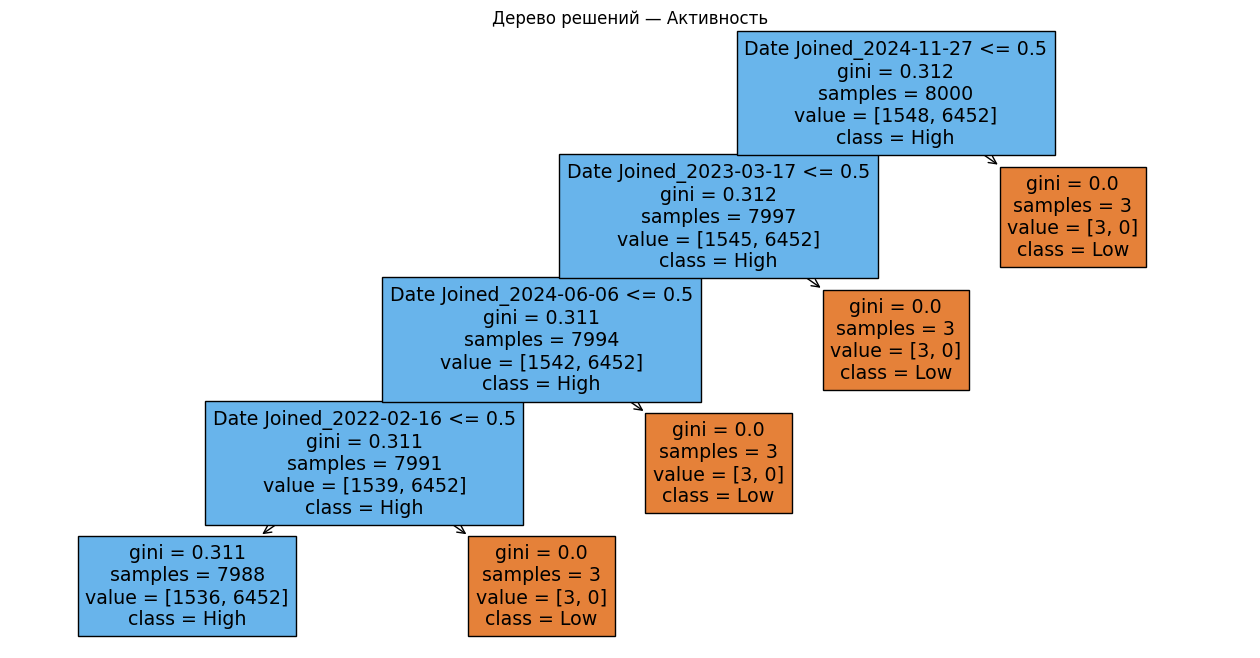

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("Social Media Users.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

df['High_Active'] = df['Daily Time Spent (min)'].apply(lambda x: 1 if x > 60 else 0)
df_encoded = pd.get_dummies(df[['Platform', 'Date Joined']], drop_first=True)

X = df_encoded
y = df['High_Active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Точность модели по активности: {acc:.2f}")

plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.title("Дерево решений — Активность")
plt.show()


Точность модели по платформе: 0.07


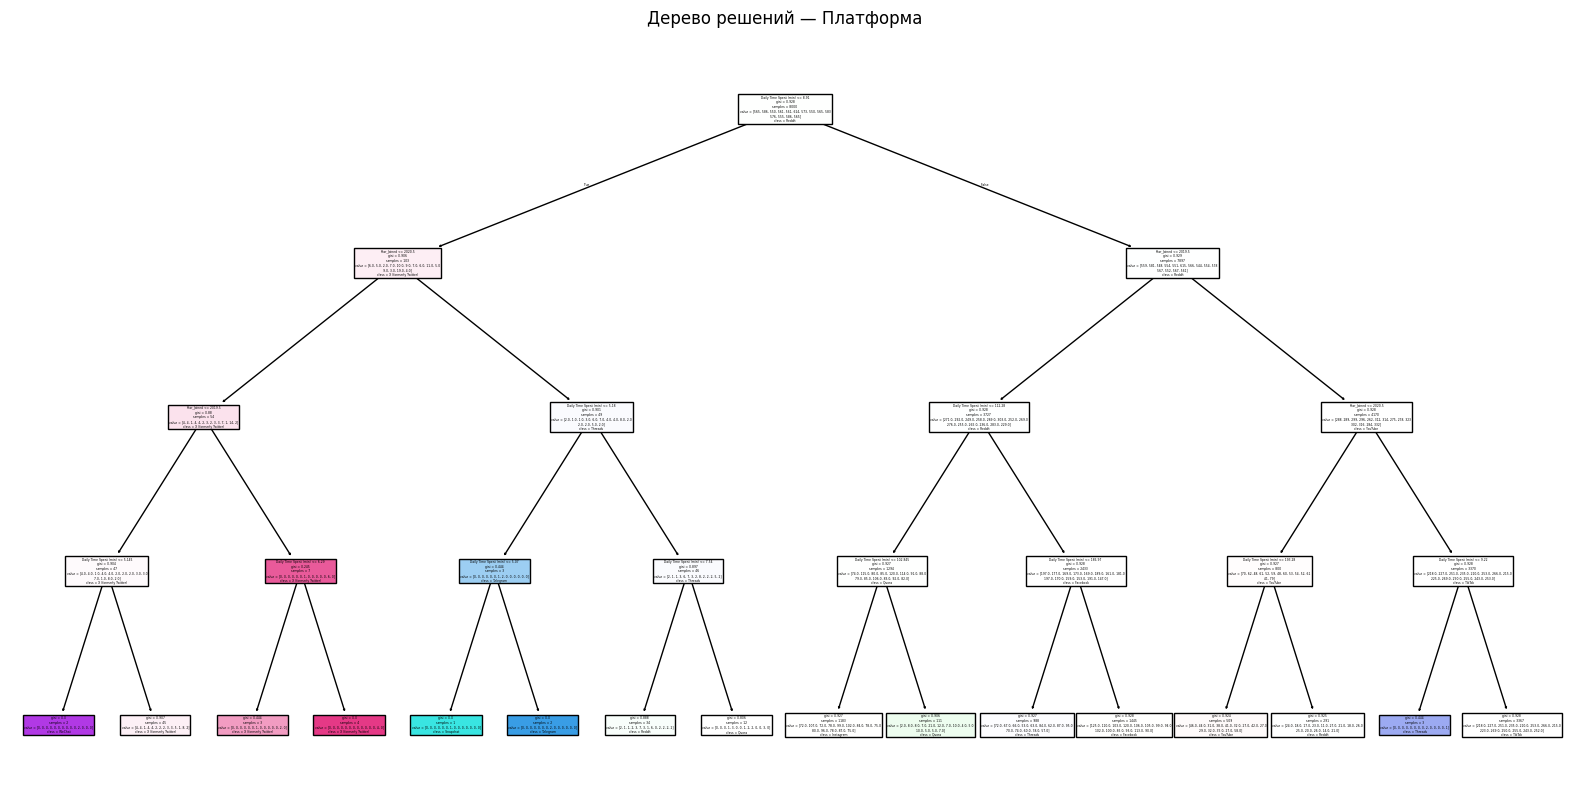

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("Social Media Users.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

df['Year_Joined'] = pd.to_datetime(df['Date Joined']).dt.year

X = df[['Daily Time Spent (min)', 'Year_Joined']]
y = df['Platform']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Точность модели по платформе: {acc:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Дерево решений — Платформа")
plt.show()
